In [9]:
import torch
import torchvision
import argparse
import matplotlib.pyplot as plt

from denoise_dataset_classification import get_args_parser, build_transform
from cae import CAE
from denoise_dataset import build_dataset

In [10]:
parser = argparse.ArgumentParser('Denoise Dataset', parents=[get_args_parser()])
# args = parser.parse_args()
args, unknown = parser.parse_known_args()

In [11]:
print(args)
print(unknown)

Namespace(data_path='DicData', data_set='image_folder', eval_data_path='DicData', nb_classes=3751)
['-f', '/root/.local/share/jupyter/runtime/kernel-e729553a-67dd-4a61-9bdd-16fc7cdeeab2.json']


In [12]:

!ls -hl checkpoint-199.pth

-rw-r--r-- 1 root root 586M Jul  1 17:37 checkpoint-199.pth


In [14]:
checkpoint = 'checkpoint-199.pth'
model = CAE(512)
ckpt = torch.load(checkpoint)
print(ckpt)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [15]:
model.load_state_dict(ckpt['model'])
model.eval()

dataset, args.nb_classes = build_dataset(args=args)
data_loader = torch.utils.data.DataLoader(
    dataset, shuffle=True,
    batch_size=1
)


Number of the class = 3751


In [28]:
for batch_data in data_loader:
    # Extract inputs and labels from the batch
    input_img, original = batch_data
    break

with torch.no_grad():
    output = model(input_img)
    

noisy = input_img[:, 0, :, :]
standard = input_img[:, 1, :, :]
print(f"noisy shape {noisy.shape}")
print(f"original shape {original.shape}")
original = torch.squeeze(original, dim=0)
print(f"original shape squeeze {original.shape}")
print(f"output shape {output.shape}")
output = torch.squeeze(output, dim=0)

noisy shape torch.Size([1, 224, 224])
original shape torch.Size([1, 1, 224, 224])
original shape squeeze torch.Size([1, 224, 224])
output shape torch.Size([1, 1, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


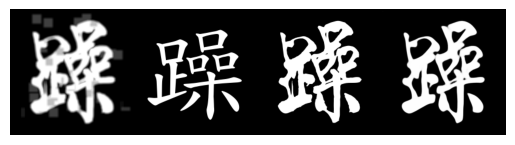

In [29]:
grid_img = torchvision.utils.make_grid([noisy, standard, original, output], nrow=4, padding=4)
plt.imshow(grid_img.permute(1, 2, 0), cmap='gray')
plt.axis('off')
plt.show()